<h2>Dataframes, Manipulation and Pandas, Oh My!</h2>
<p>In this workshop, we are going to learn how to use pandas, a data science library in python that allows us to load csv files into useful dataframes. Dataframes are like spreadsheets with more functionality, letting us load large amounts of data and easily clean and analyze the data.</p>
<p>First, we need to import the pandas library. We are also going to import pyplot, a library that we will later use to visualize our data. The "as" statements are so we can rename our libraries so we can more easily call them when we need them</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>Loading a CSV Into a Dataframe</h3>
<p>Now that we have imported pandas, we can create our first dataframe. We do this with the read_csv() function. In addition to calling read_csv() from the pandas library and assigning it to a variable, you also need to write the file path in the parentheses.</p>
<p>To make sure we have loaded the csv into a dataframe correctly, we can call the .head() function on our dataframe. This outputs a nice, spreadsheet-like visualization of the dataframe. You can also modify how many rows you want to display by writing how many you want to see in the parentheses. The default number of rows is 5. </p>

In [15]:
nw_df = pd.read_csv("../data/raw/nw.csv")
nw_df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'data/nw.csv'

<h3>Dataframe Basics</h3>
<p>We can select columns in the dataframe by writing df['col_name'] like below</p>

In [3]:
nw_df['Person ID']

0            NW-0
1            NW-0
2            NW-0
3            NW-0
4            NW-0
           ...   
75720    NW-19752
75721    NW-19752
75722    NW-19752
75723    NW-19752
75724    NW-19752
Name: Person ID, Length: 75725, dtype: object

We can select rows in the dataframe by using slicing indices. This looks like df[beginning:end] (note that the ending index is not inclusive, and indices start at 0).

In [4]:
nw_df[0:5]

,Person ID,Court,Offense Date,Age at Offense,Filed,Status,Count,Charge,Disposition,Dispo Date
0,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,1,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
1,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,2,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
2,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,3,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
3,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,4,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
4,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,5,ARSON OF DWELLING HOUSE c266 §1,Not Guilty,2016-03-30


Slicing dataframes works just like lists in Python, so you can also get the first five rows with [:5].

In [5]:
nw_df[:5]

,Person ID,Court,Offense Date,Age at Offense,Filed,Status,Count,Charge,Disposition,Dispo Date
0,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,1,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
1,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,2,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
2,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,3,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
3,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,4,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
4,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,5,ARSON OF DWELLING HOUSE c266 §1,Not Guilty,2016-03-30


You can also combine row slicing with column selection (order does not matter). For instance, we can get the last five ages of offense like below

In [6]:
nw_df['Age at Offense'][-5:]

75720    31.0
75721    31.0
75722    31.0
75723    31.0
75724    31.0
Name: Age at Offense, dtype: float64

Finally, we can select multiple columns. If we want the age at offense at disposition of the first 10 entries in the dataframe we can call

In [7]:
nw_df[['Age at Offense', 'Disposition']][:10]

,Age at Offense,Disposition
0,21.0,Not Guilty
1,21.0,Not Guilty
2,21.0,Not Guilty
3,21.0,Not Guilty
4,21.0,Not Guilty
5,21.0,Not Guilty
6,25.0,Dismissed on Payment
7,25.0,Not Responsible
8,25.0,Not Responsible
9,25.0,Continued w/o Finding


<h3>Renaming Columns</h3>
<p>We can also rename the columns in a dataframe. This can help to clarify your data for downstream analysis. To do this, we can call df.rename(columns={'old_name_1':'new_name_1', 'old_name_2':'new_name_2'})</p>

In [8]:
nw_df.rename(columns={'Dispo Date': 'Disposition Date'})

,Person ID,Court,Offense Date,Age at Offense,Filed,Status,Count,Charge,Disposition,Disposition Date
0,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,1,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
1,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,2,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
2,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,3,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
3,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,4,ASSAULT TO MURDER c265 §15,Not Guilty,2016-03-30
4,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,5,ARSON OF DWELLING HOUSE c266 §1,Not Guilty,2016-03-30
...,...,...,...,...,...,...,...,...,...,...
75720,NW-19752,Belchertown District Court,2018-12-28,31.0,2018-12-31,Closed,1,KIDNAPPING c265 §26,Dismissed at Request of Comm,2019-03-20
75721,NW-19752,Belchertown District Court,2018-12-28,31.0,2018-12-31,Closed,2,A&B PREGNANT VICTIM,Nolle Prosequi,2019-01-31
75722,NW-19752,Belchertown District Court,2018-12-28,31.0,2018-12-31,Closed,3,Assault & Battery on Family/Household Member ...,Guilty,2019-03-20
75723,NW-19752,Belchertown District Court,2018-12-28,31.0,2018-12-31,Closed,4,ASSAULT W/DANGEROUS WEAPON c265 §15B(b),Dismissed at Request of Comm,2019-03-20


<h3>Describing the Dataframe</h3>

<p> As you can imagine, these dataframes can be very unwieldy when you first load them. In order to get some summary data on our data, let's call the .describe() function.</p>

In [9]:
nw_df.describe()

,Age at Offense,Count
count,74783.000000,75725.000000
mean,32.899509,2.830875
std,12.390618,7.428723
min,-242.000000,0.000000
25%,23.000000,1.000000
50%,30.000000,2.000000
75%,41.000000,3.000000
max,94.000000,360.000000


<p>Great! We now have some descriptive statistics on our data and can start to make sense of what our data is saying. Except, if you look a little closer, there's still some problems. For one, we are only seeing a description of 2 columns of our data while the original file has 10. Also, the minimum age of offense is -242 years old, which doesn't make much sense. Let's get a broader overview of our data using the .info() function</p>

In [10]:
nw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75725 entries, 0 to 75724
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Person ID       75725 non-null  object 
 1   Court           75725 non-null  object 
 2   Offense Date    74915 non-null  object 
 3   Age at Offense  74783 non-null  float64
 4   Filed           75725 non-null  object 
 5   Status          75725 non-null  object 
 6   Count           75725 non-null  int64  
 7   Charge          75725 non-null  object 
 8   Disposition     72259 non-null  object 
 9   Dispo Date      71881 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.8+ MB


<h3>Dealing With Incomplete Entries</h3>
<p>Now we have a broader overview of the structure of our dataframe, with each row in the info() output describing a column of the dataframe. Here we can see that only two of the columns are numbers, which is why we only had two sets of descriptive statitics. We can also see that not every row is complete, since the number of non-null entries for each row is not equal among the columns (null meaning that there is no data for that column).</p>

<p>Incomplete data entries are often a problem for data analysis. For instance, we are missing ~4000 dispo date entries. If the dispo date data is not useful for your data analysis, you can largely ignore this. But often we want to clean our data before we start analysis, and incomplete entries can throw errors down the line. There are many approaches you can take to filling these entries in, but the easiest approach is just to delete all entries that are not complete. We are going to do this with the .dropna() function. We are also going to pass the argument "inplace = True" so that it will modify the existing dataframe and we don't have to create a new one.</p>



In [11]:
num_raw_entries = len(nw_df.index)

nw_df.dropna(inplace = True)
nw_df.info()

num_complete_entries = len(nw_df.index)

percent_null = float(1 -(num_complete_entries/num_raw_entries))*100
print("The raw data was {:.2f}".format(percent_null) + "% incomplete")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71068 entries, 0 to 75724
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Person ID       71068 non-null  object 
 1   Court           71068 non-null  object 
 2   Offense Date    71068 non-null  object 
 3   Age at Offense  71068 non-null  float64
 4   Filed           71068 non-null  object 
 5   Status          71068 non-null  object 
 6   Count           71068 non-null  int64  
 7   Charge          71068 non-null  object 
 8   Disposition     71068 non-null  object 
 9   Dispo Date      71068 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.0+ MB
The raw data was 6.15% incomplete


<p>Perfect, now we only have complete data entries! As a disclaimer, completely dropping incomplete entries is not always the correct approach. Luckily for us, incomplete entries only represented 6.15% of our original data, so we still have a lot to work with. Let's look at the descriptive statistics on the modified data set to see if it drastically changed our data.</p>

In [12]:
nw_df.describe()

,Age at Offense,Count
count,71068.000000,71068.000000
mean,32.858347,2.689649
std,12.418212,7.024832
min,-242.000000,0.000000
25%,23.000000,1.000000
50%,30.000000,2.000000
75%,41.000000,3.000000
max,94.000000,360.000000


<p>Looks like most of the metrics are the same, so our modification did not affect the data much</p>

<h3>Graphing the Data</h3>
<p>There are still some entries in our data set that do not make sense, like how someone has 0 charges or was -242 years old for their possible offense. Some simple graphs of the data can reveal what these outliers look like further. Let's start by constructing a histogram for the ages at offense using pyplot.</p>

<p>We are going to do this using the pyplot module of matplotlib. We do this by calling plt.hist(), where we pass the dataframe and which column we want to plot in the parentheses. It is also a good idea to title your chart and axes, which we can do ax.set_title(), ax.set_xlabel(), and ax.set_ylabel() as shown below.</p>

Text(0, 0.5, 'Frequency (log scale)')

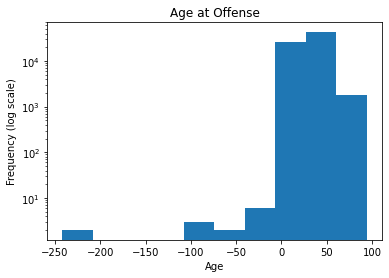

In [13]:
fig,ax = plt.subplots()
ax.hist(nw_df['Age at Offense'])
ax.set_yscale('log')
ax.set_title('Age at Offense')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency (log scale)')

<p>As we can see from the plot, we have a few negative age at offense entries. Since these are nonsensical in the real world, we can remove them without removing much of our data. Let's make the minimum age 0. We can filter the dataframe to adhere to this condition by using the command below:</p>

Text(0, 0.5, 'Frequency (log scale)')

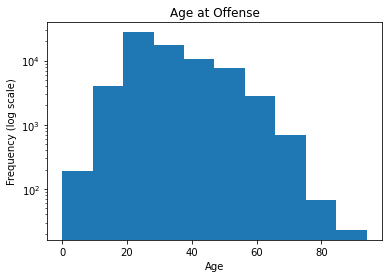

In [14]:
nw_df_filtered = nw_df[nw_df['Age at Offense'] >= 0]

fig,ax = plt.subplots()
ax.hist(nw_df_filtered['Age at Offense'])
ax.set_yscale('log')
ax.set_title('Age at Offense')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency (log scale)')